In [1]:
import pandas as pd
import seaborn as sns

비어있는 값(NaN) => 결측값 이라고 하는데   
결측값이 있는것은 -> 데이터가 '완결성'이 없다는걸 뜻함

In [3]:
df= pd.read_csv('data/attendance.csv',index_col=0)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


큰 데이터에서는 결측값이 한 눈에 안보이니까  
결측값을 찾아내야 한다.

In [4]:
# 불린 값으로 보여주는데
# 여기서 NaN값을 True로 보여줌
df.isnull()

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,False,False,False,False,False
2009,False,False,False,False,False
2010,False,False,True,False,False
2011,False,False,False,False,False
2012,False,False,True,False,False
2013,False,False,True,False,False
2014,False,False,False,False,False
2015,False,False,False,False,False
2016,False,False,False,False,False


In [5]:
# 결측값이 어디 있는지 확인하기 편함
df.isnull().sum()

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

결측값 해결 방법

In [9]:
# 결측값을 해결하는 가장 좋은 방법은 값을 채워 넣는거고
# 그게 불가능 하다면
# 1. 그냥 둔다.( 결측값 자체에 의미가 있을 때 )
# 2. 결측값이 있는 인덱스를 아예 제거해 버린다. ( 데이터 손실의 우려 )
# 3. 결측값이 많은 컬럼을 삭제한다. ( 데이터 손실의 우려 )
# 4. 데이터 보존을 위해 결측값이 대체 하는 경우

In [8]:
# 2. 결측값 인덱스 제거 -> 이거 기존 데이터프레임이 안바뀐다. inplace =True 필요
# df.dropna(inplace = True)
df.dropna()

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [10]:
# 3. 결측값이 있는 컬럼 삭제
# 결측값이 있는 컬럼이 사라진다.
df.dropna(axis = 'columns')

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


In [11]:
# 4. 결측값을 다른 값으로 대체
# fillna() 로 기존 데이터 프레임을 바꾸고 싶으면 inplace = True 필요
df.fillna(0)

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,0.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,0.0,4537,1150
2013,11373,7656,0.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [18]:
# 가장 많이 하는 대체값은 보통 평균값 또는 중간값으로 대체 한다.
df.fillna(df.mean()) # 평균값 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.000000,4208,1329
2009,11562,10983,1471.000000,4152,1206
2010,11402,12873,1933.857143,3870,705
2011,13055,10709,1774.000000,3955,1445
2012,13747,7157,1933.857143,4537,1150
2013,11373,7656,1933.857143,4092,1237
2014,11429,8115,1967.000000,4458,1417
2015,10357,7720,2311.000000,3953,1480
2016,11583,7854,2336.000000,3543,1425


In [17]:
df.fillna(df.median()) # 중간값 대체

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [20]:
df = pd.read_csv('data/dust.csv',index_col=0)
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


데이터에 중복되는 값이 있으면 '유일성'이 해친다.

In [21]:
# 1. row가 중복되는 경우
# 2. columns가 중복 되는 경우

In [24]:
# 1. row가 중복 되는 경우
df.index.value_counts() # 07월 31일 중복

07월 31일    2
08월 10일    1
07월 30일    1
07월 20일    1
07월 18일    1
08월 05일    1
07월 26일    1
07월 13일    1
07월 22일    1
07월 16일    1
07월 28일    1
08월 11일    1
07월 15일    1
08월 08일    1
07월 14일    1
07월 29일    1
08월 09일    1
07월 19일    1
08월 07일    1
08월 01일    1
07월 21일    1
08월 03일    1
08월 04일    1
08월 02일    1
07월 17일    1
07월 27일    1
08월 06일    1
07월 23일    1
07월 25일    1
07월 24일    1
Name: 날짜, dtype: int64

In [26]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [28]:
df.drop_duplicates(inplace = True) # 알아서 중복된값 삭제 시킨다.
# inplace = True 필요
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [33]:
# 2. 컬럼이 중복 되는 경우
# 이 T가 행렬에서 행과 열이 바뀌는 뜻인데
# 이걸 여기서 쓰면 인덱스와 컬럼이 바뀐다.
# 이 상태로 df.drop_duplicates() 를 하면 중복되는 컬럼이 중복되는 행으로 바뀌었으니까 삭제 되겠지
df.T.drop_duplicates()

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


In [34]:
# 얘는 T가 있어서 inplace=True로 안바뀌기 때문에
# 새로운 변수에 넣어줌
df=df.T.drop_duplicates().T
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26


이상점 => 다른 값들과 너무 동떨어져 있는 데이터  
이상점을 판단하는 기준이 여러개가 있는데 (절대적인 기준이란 없다, 이상점을 보는방법이 많을 뿐)  
그 중 하나는 boxplot에서 75%지점(Q3), 50%지점(Q2), 25%지점(Q1)의 합을 IQR이라고 하는데  
25%(Q1) 지점에서 1.5IQR 넘겨 내려가면 이상점이라고 보고, 75%(Q3)의 지점에서 1.5IQR이상 높은 값을 이상점이라고 본다.  
IF 이상점이 잘못된 데이터라면 -> 고치거나, 삭제  
IF 이상점이 제대로된 데이터라면 -> 분석에 방해되면 제거, 의미있는 정보라면 그냥 둔다. => 상황에 맞는 판단이 필요  
이렇게 데이터에 이상점이 존재하거나 아예 틀린값이 들어가 있는걸 '정확성' 이 부족하다고 한다.

# 이상점이 잘못된 데이터 일때

In [36]:
df= pd.read_csv('data/beer.csv',index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<AxesSubplot:>

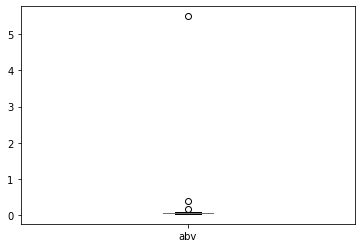

In [38]:
df.plot(kind='box', y='abv')

In [39]:
# 25,75위치 확인
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [41]:
# 이렇게도 25 75 위치를 알 수 있다.
q1=df['abv'].quantile(0.25)
q3=df['abv'].quantile(0.75)
iqr = q3-q1

In [43]:
condition=(df['abv']<q1-1.5*iqr) | (df['abv']>q3+1.5*iqr ) # -> 이것만 하면 불린 인덱싱이 나오고
df[condition] # -> 불린인덱싱을 통해서 뽑은 이상점만 나오게된다

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [44]:
# 맥주가 아닌 소주와 보드카를 날리고, ale 맥주는 abv를 잘못 집어 넣었으므로 값만 교체한다.
df.loc[2250,'abv'] = 0.055

In [46]:
condition=(df['abv']<q1-1.5*iqr) | (df['abv']>q3+1.5*iqr )
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [47]:
df[condition].index

Int64Index([963, 1856], dtype='int64')

In [48]:
# 이상점이 있는 인덱스를 삭제
df.drop(df[condition].index, inplace =True)

In [49]:
# 이상점이 안남아있음
condition=(df['abv']<q1-1.5*iqr) | (df['abv']>q3+1.5*iqr )
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


<AxesSubplot:>

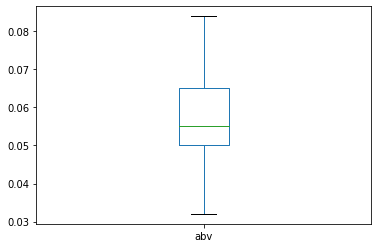

In [50]:
df.plot(kind='box', y='abv')

# 이상점이 제대로된 데이터 일때

In [54]:
# 관계적 이상점
# 두 변수의 관계를 고려했을 때 이상한 데이터 
# ex. 키 190cm에 몸무게 40kg 각각으로 봤을 때는 잘못된 데이터는 아니나 둘을 합쳐서 보면 조금 이상함

In [55]:
df= pd.read_csv('data/exam_outlier.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

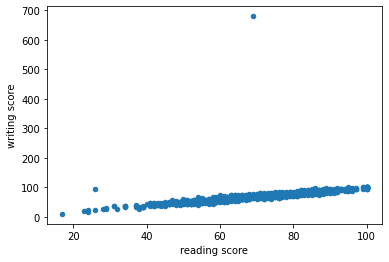

In [56]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [57]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [58]:
df[df['writing score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [59]:
df.drop(51, inplace=True)
# 100점 넘는 이상점 삭제

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

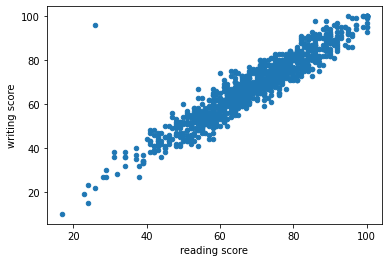

In [60]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [61]:
df.corr() # 읽기 쓰기의 상관계수가 올라갔다.

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [63]:
df[(df['writing score']>90) & (df['reading score'] < 40)] # 읽기 점수가 비정상적으로 낮은 이상점 -> 분석하기에 분리

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [64]:
df.drop(373,inplace=True)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

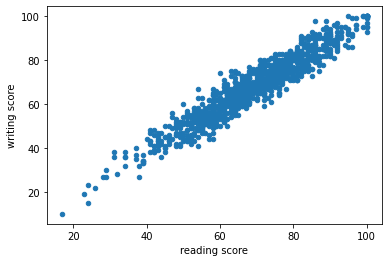

In [65]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [66]:
df.corr() # 이상점을 모두 지우니 상관관계가 올라갔다.

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000
